# Preprocessing_v0
This notebook shows prelimineray activity of the dataset provided by the kaggle:
(https://www.kaggle.com/datasets/anasmohammedtahir/covidqu)


## 1- Data preparation
Following steps consider images and lung masks are gathered in 3 separated classes 'COVID-19', 'Non-COVID', 'Normal'.
- Read image and masks
- Apply masking
- Normalize and save masked images

Randomly check saved data


In [3]:

import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os


In [1]:
base_path = r'C:\Users\tomba\Documents\GitHub\MAR24_BDS_Radios_Pulmonaire\data\processed\Lung Segmentation Data'

Trial of masking on a batch of COVID images and masks:

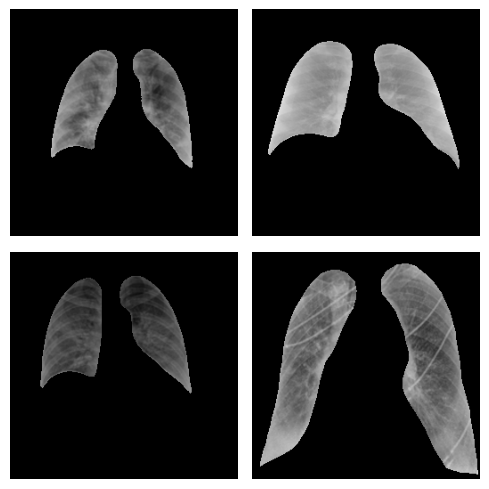

In [4]:
number_of_images = 4  
plt.figure(figsize=(5, 5))  


image_folder = r'C:\Users\tomba\Documents\GitHub\MAR24_BDS_Radios_Pulmonaire\data\processed\Lung Segmentation Data\COVID-19\images'
masks_folder = r'C:\Users\tomba\Documents\GitHub\MAR24_BDS_Radios_Pulmonaire\data\processed\Lung Segmentation Data\COVID-19\lung masks'


images = sorted(os.listdir(image_folder))[:number_of_images]
masks = sorted(os.listdir(masks_folder))[:number_of_images]

for i in range(number_of_images):
    img_path = os.path.join(image_folder, images[i])
    mask_path = os.path.join(masks_folder, masks[i])
    
    img = cv2.imread(img_path,  cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    masked_image = cv2.bitwise_and(img, img, mask=mask)

    plt.subplot(int(number_of_images / 2), 2, i + 1)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbering

plt.tight_layout()
plt.show()

In [5]:
def image_masking_to_array(image_folder, mask_folder):
    '''
    Function to apply masking:
    Reading of the image and mask.
    Apply cv2.bitwise_and, creating a new image, store it in array.
    
    Param:
    - image_folder: directory of the image folder
    - mask_folder: directory of the corresponding mask

    Return:
    matrix multi-array containing all the masked images
    '''
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith('.png')])

    if len(image_files) != len(mask_files):
        raise ValueError("The number of images and masks do not match.")
    
    masked_images = []

    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        img = cv2.imread(img_path,  cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        masked_image = cv2.bitwise_and(img, img, mask=mask)

        masked_images.append(masked_image)

    full_mat = np.array(masked_images)
    
    return full_mat

In [6]:
def min_max_normalize_and_save_images(data, output_dir, group):
    '''
    Function to apply Min-Max normalization et save the normalized image in a specified diretiry:
        
    Param:
    - data in array type
    - output_dir: target directory 
    - goupe: name of the file

    Return:
    None
    '''
    os.makedirs(output_dir, exist_ok=True)
    
    for i, array in enumerate(data):

        min_val = np.min(array)
        max_val = np.max(array)

        if max_val - min_val == 0:
            normalized_array = np.zeros_like(array, dtype=np.float32)
        else:
            normalized_array = (array - min_val) / (max_val - min_val)

        normalized_image = (normalized_array * 255).astype(np.uint8)

        filename = os.path.join(output_dir, f'{group}_{i}.png')
        cv2.imwrite(filename, normalized_image)

In [8]:
for group in os.listdir(base_path):
    img_mask_dir = os.path.join(base_path, group, 'masked images')
    img_dir = os.path.join(base_path, group, 'images')
    mask_dir = os.path.join(base_path, group, 'lung masks')
    min_max_normalize_and_save_images(image_masking_to_array(img_dir, mask_dir), img_mask_dir, group)
    

In [10]:
def display_random_image(directory): 
    files = [file for file in os.listdir(directory) if file.endswith(('.png', '.jpg', '.jpeg'))]
    
    if not files:
        print("No images found in the directory.")
        return

    random_file = np.random.choice(files)
    image_path = os.path.join(directory, random_file)

    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to read the image from {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f"Random Image: {random_file}")
    plt.axis('off')  
    plt.show()

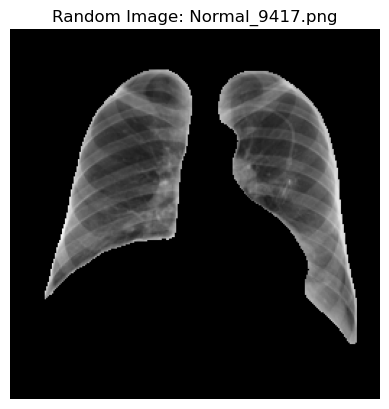

In [26]:
# Reading any masked_images created in previous cells
group_list =np.random.choice(os.listdir(base_path))
display_random_image(os.path.join(base_path, group_list, 'masked images'))